# Demo Code of Chapter 2

## Data Type for Simulator

We support four different types:

In [60]:
import numpy as np
import mindquantum as mq

all_types = [mq.float32, mq.float64, mq.complex64, mq.complex128]

Convert dtype from numpy and to numpy

In [61]:
mq_float64 = mq.to_mq_type(np.float64)
numpy_float64 = mq.to_np_type(mq.float64)

## [ParameterResolver](https://www.mindspore.cn/mindquantum/docs/en/master/core/parameterresolver/mindquantum.core.parameterresolver.ParameterResolver.html)

In [62]:
import numpy as np
import mindquantum as mq
from mindquantum.core.parameterresolver import ParameterResolver

### Basic Usage

In [63]:
pr1 = ParameterResolver({'a': 1.0, 'b': 2.0 + 2.1j}, np.pi, dtype=mq.complex128) # dtype would be float64 by default

pr1

ParameterResolver(dtype: complex128,
  data: [
         a: (1.000000, 0.000000),
         b: (2.000000, 2.100000)
  ],
  const: (3.141593, 0.000000)
)

In [64]:
print(pr1.expression())

a + (2 + 2.1j)*b + π


### Another Two Constructors

In [65]:
pr2 = ParameterResolver('a') # A single variable: a
pr3 = ParameterResolver(1.2) # A constant number: 1.2
print(pr2)
print(pr3)

a
6/5


### Type Conversion

In [66]:
pr4 = pr1.astype(mq.float64)
print(pr4)

a + 2*b + π


Set variable to encoder variable and do not calculate gradient

In [67]:
pr4.encoder_part('a')
pr4.no_grad_part('a')
print('Encoder parameters: ', pr4.encoder_parameters)
print('Require grad parameters: ', pr4.requires_grad_parameters)

Encoder parameters:  ['a']
Require grad parameters:  ['b']


## [Quantum Gates](https://www.mindspore.cn/mindquantum/docs/en/master/core/gates/mindquantum.core.gates.BasicGate.html)

In [68]:
import numpy as np
from mindquantum.core import gates as G
from mindquantum.core.parameterresolver import ParameterResolver

### Non Parameterized Gate

In [69]:
h = G.H.on(0)
h

H(0)

In MindQuantum, you can convert **any quantum gate** to a control gate just by adding control qubits:

In [70]:
print(G.H.on(0, ctrl_qubits=1))             # single control qubit
print(G.H.on(0, ctrl_qubits=[1, 2]))        # multi control qubits

H(0 <-: 1)
H(0 <-: 1 2)


### Parameterized Gate

In [71]:
var_a = ParameterResolver('a')
rx = G.RX(var_a).on(0)
rx

RX(a|0)

Or for a simply way:

In [72]:
rx = G.RX('a').on(0)
rx

RX(a|0)

### Custom Matrix Gate

In [73]:
h_mat = np.array([[1, 1], [1, -1]]) / np.sqrt(2)
custom_h = G.UnivMathGate('Fake_H', h_mat).on(0, [1, 2, 3])
custom_h

Fake_H(0 <-: 1 2 3)

### Custom Parameterized Gate

MindQuantum also support custom parameterized gate by JIT with numba.

In [74]:
def rx_mat(ang):
    return np.array([[np.cos(ang / 2), -np.sin(ang / 2) * 1j],
                     [-np.sin(ang / 2) * 1j,
                      np.cos(ang / 2)]])


def rx_diff_mat(ang):
    return np.array([[-np.sin(ang / 2), -np.cos(ang / 2) * 1j],
                     [-np.cos(ang / 2) * 1j,
                      -np.sin(ang / 2)]]) / 2

custom_rx = G.gene_univ_parameterized_gate('Fake_RX', rx_mat, rx_diff_mat)
rx = custom_rx('a').on(0)
rx

Fake_RX(a|0)

### All Quantum Gate

In [75]:
print(f'The Quantum Gate support in version {mq.__version__}:')
print("https://www.mindspore.cn/mindquantum/docs/zh-CN/master/core/mindquantum.core.gates.html")
for i in G.__all__:
    print(i)

The Quantum Gate support in version 0.9.0:
https://www.mindspore.cn/mindquantum/docs/zh-CN/master/core/mindquantum.core.gates.html
AmplitudeDampingChannel
BARRIER
BarrierGate
BasicGate
BitFlipChannel
BitPhaseFlipChannel
CNOT
CNOTGate
DepolarizingChannel
FSim
Givens
GlobalPhase
GroupedPauli
GroupedPauliChannel
H
HERMITIAN_PROPERTIES
HGate
I
IGate
ISWAP
ISWAPGate
KrausChannel
Measure
MeasureResult
NoiseGate
NoneParameterGate
ParameterGate
PauliChannel
PhaseDampingChannel
PhaseFlipChannel
PhaseShift
Power
QuantumGate
RX
RY
RZ
Rn
RotPauliString
Rxx
Rxy
Rxz
Ryy
Ryz
Rzz
S
SGate
SWAP
SWAPGate
SWAPalpha
SX
SXGate
T
TGate
ThermalRelaxationChannel
U3
UnivMathGate
X
XGate
Y
YGate
Z
ZGate
gene_univ_parameterized_gate


## [Quantum Circuit](https://www.mindspore.cn/mindquantum/docs/en/master/core/circuit/mindquantum.core.circuit.Circuit.html)

In [76]:
from mindquantum.core.circuit import Circuit
from mindquantum.core import gates as G
from mindquantum.core.parameterresolver import ParameterResolver

## Construction

Construct a [quantum circuit](https://www.mindspore.cn/mindquantum/docs/en/master/core/circuit/mindquantum.core.circuit.Circuit.html) is easy by adding [quantum gate](https://www.mindspore.cn/mindquantum/docs/en/master/core/gates/mindquantum.core.gates.BasicGate.html) to [quantum circuit](https://www.mindspore.cn/mindquantum/docs/en/master/core/circuit/mindquantum.core.circuit.Circuit.html).

In [77]:
circ = Circuit()
circ += G.H.on(0)
circ += G.RX('a').on(1, 0)
circ

┏━━━┓             
q0: ──┨ H ┠─────■───────
      ┗━━━┛     ┃       
            ┏━━━┻━━━┓   
q1: ────────┨ RX(a) ┠───
            ┗━━━━━━━┛

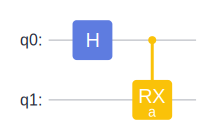

In [78]:
circ.svg()

You can also easily saving the circuit to svg file:

In [79]:
circ.svg().to_file('circ.svg')

### Another Two Constructions

Construct from a gate list.

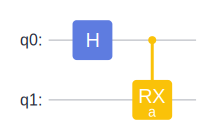

In [80]:
circ = Circuit([G.H.on(0), G.RX('a').on(1, 0)])
circ.svg()

Construct by chain rule.

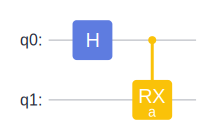

In [81]:
circ = Circuit().h(0).rx('a', 1, 0)
circ.svg()

### Convert to Encoder Circuit

In [82]:
print(circ.encoder_params_name)

circ = circ.as_encoder()
print(circ.encoder_params_name)

[]
['a']


### Summary the Information

In [83]:
circ.summary()

        Circuit Summary         
╭──────────────────────┬───────╮
│ Info                 │ value │
├──────────────────────┼───────┤
│ Number of qubit      │ 2     │
├──────────────────────┼───────┤
│ Total number of gate │ 2     │
│ Barrier              │ 0     │
│ Noise Channel        │ 0     │
│ Measurement          │ 0     │
├──────────────────────┼───────┤
│ Parameter gate       │ 1     │
│ 1 encoder parameter  │ a     │
╰──────────────────────┴───────╯

### Get Matrix of A Quantum Circuit

In [84]:
circ.matrix(ParameterResolver({'a': 1.0}))

array([[ 0.70710678+0.j        ,  0.70710678+0.j        ,
         0.        +0.j        ,  0.        +0.j        ],
       [ 0.62054458+0.j        , -0.62054458+0.j        ,
         0.        -0.33900505j,  0.        +0.33900505j],
       [ 0.        +0.j        ,  0.        +0.j        ,
         0.70710678+0.j        ,  0.70710678+0.j        ],
       [ 0.        -0.33900505j,  0.        +0.33900505j,
         0.62054458+0.j        , -0.62054458+0.j        ]])

Or Simplify:

In [85]:
circ.matrix({'a': 1.0})

array([[ 0.70710678+0.j        ,  0.70710678+0.j        ,
         0.        +0.j        ,  0.        +0.j        ],
       [ 0.62054458+0.j        , -0.62054458+0.j        ,
         0.        -0.33900505j,  0.        +0.33900505j],
       [ 0.        +0.j        ,  0.        +0.j        ,
         0.70710678+0.j        ,  0.70710678+0.j        ],
       [ 0.        -0.33900505j,  0.        +0.33900505j,
         0.62054458+0.j        , -0.62054458+0.j        ]])

### Final State

Get final state in numpy array.

In [86]:
circ.get_qs(pr={'a': 1.0})

array([0.70710678+0.j        , 0.62054458+0.j        ,
       0.        +0.j        , 0.        -0.33900505j])

Get final state in ket string.

In [87]:
print(circ.get_qs(ket=True, pr={'a': 1.0}))

√2/2¦00⟩
0.6205445805637456¦01⟩
-0.33900504942104487j¦11⟩


## [Advance Operator for Circuit](https://www.mindspore.cn/mindquantum/docs/zh-CN/master/core/mindquantum.core.circuit.html#function)

In [88]:
from mindquantum.core.circuit import apply, add_prefix


Apply circuit to other qubits.

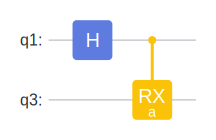

In [89]:
apply(circ, [1, 3]).svg()

Add a prefix to all parameters.

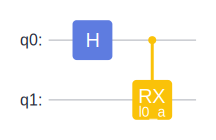

In [90]:
add_prefix(circ, 'l0').svg()

### Observables

In [91]:
import numpy as np
import mindquantum as mq
from mindquantum.core.operators import QubitOperator, FermionOperator
from mindquantum.core.parameterresolver import ParameterResolver

Construct a [QubitOperator](https://www.mindspore.cn/mindquantum/docs/en/master/core/operators/mindquantum.core.operators.QubitOperator.html).

In [92]:
q0 = QubitOperator('X0 Y1', ParameterResolver('a', dtype=mq.complex128))
print(q0)
print(q0.dtype)

a [X0 Y1]
mindquantum.complex128


Or simplify:

In [93]:
q0 = QubitOperator('X0 Y1', 'a')
print(q0)
print(q0.dtype)

a [X0 Y1]
mindquantum.float64


Construct a [FermionOperator](https://www.mindspore.cn/mindquantum/docs/en/master/core/operators/mindquantum.core.operators.FermionOperator.html).

In [94]:
f0 = FermionOperator('1^ 0', np.sqrt(2))     # '^' means dagger.
print(f0)

√2 [1^ 0]


Arithmetic operation is also supported. For example: $Z_1 \otimes X_0$

In [95]:
q1 = QubitOperator('X0') * QubitOperator('Z1')
print(q1)

1 [X0 Z1]


In [96]:
QubitOperator('X0') * QubitOperator('Z1') - QubitOperator('Z1') * QubitOperator('X0')

0

In [97]:
q1 * 3.0 + 1.0

3 [X0 Z1] +
1 []

You can also set the parameter value of operator.

In [98]:
q2 = QubitOperator('X0', 'a')
print(q2)
q2 = q2.subs({'a': 2.3})
print(q2)

a [X0]
2.3 [X0]


Get the matrix form of a operator.

In [99]:
csr_matrix = q2.matrix()
csr_matrix.toarray()

array([[0. +0.j, 2.3+0.j],
       [2.3+0.j, 0. +0.j]])

## [Quantum Simulator](https://www.mindspore.cn/mindquantum/docs/en/master/simulator/mindquantum.simulator.Simulator.html)

In MindQuantum, we support three simulator:

- `'mqvector'`: A state vector simulator based on CPU.
- `'mqvector_gpu'`: A state vector simulator based on GPU.
- `'mqmatrix'`: A density matrix simulator based on CPU.

In [100]:
from mindquantum.core.gates import X
from mindquantum.core.circuit import Circuit
from mindquantum.core.operators import Hamiltonian, QubitOperator
from mindquantum.simulator import Simulator
from mindquantum import complex128, complex64

By default, the simulator is double precision simulator, you are able to change it to single precision.

In [101]:
sim = Simulator('mqvector', 2)
sim_single = Simulator('mqvector', 2, dtype=complex64)
sim_density = Simulator('mqmatrix', 2)
print(sim)

mqvector simulator with 2 qubits (little endian), dtype: mindquantum.complex128.
Current quantum state:
1¦00⟩


Quantum state in ket format uses "little endian", which means qubits sorted from the largest to the smallest, i.e. $\left|q_1q_0\right>$.

### Apply Gate

In [102]:
sim.apply_gate(X.on(0))
sim

mqvector simulator with 2 qubits (little endian), dtype: mindquantum.complex128.
Current quantum state:
1¦01⟩

### Reset to Zero State

In [103]:
sim.reset()
sim

mqvector simulator with 2 qubits (little endian), dtype: mindquantum.complex128.
Current quantum state:
1¦00⟩

### Apply Circuit

In [104]:
circ = Circuit([X.on(0), X.on(1)])
sim.apply_circuit(circ)
sim

mqvector simulator with 2 qubits (little endian), dtype: mindquantum.complex128.
Current quantum state:
1¦11⟩

### Apply Hamiltonian

Apply hamiltonian to this simulator, i.e. calculating $H\left|\psi\right>$.

In [105]:
ops = QubitOperator('Z0')
ham = Hamiltonian(ops)
sim.apply_hamiltonian(ham)
sim

mqvector simulator with 2 qubits (little endian), dtype: mindquantum.complex128.
Current quantum state:
-1¦11⟩

### Get Expectation

Get expectation of the given hamiltonian, i.e. calculating $\left<\psi\right|H\left|\psi\right>$.

In [106]:
sim.reset()
expectation = sim.get_expectation(ham, circ)
print(expectation)

(-1+0j)


### Get Quantum State

In [107]:
qs = sim.get_qs()
qs

array([1.+0.j, 0.+0.j, 0.+0.j, 0.+0.j])

### Sampling
Sampling the circuit with measurement gate.

In [108]:
sim.reset()
circ.measure_all()
res = sim.sampling(circ, shots=100)
res

shots: 100
Keys: q1 q0│0.00     0.2         0.4         0.6         0.8         1.0
───────────┼───────────┴───────────┴───────────┴───────────┴───────────┴
         11│▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓
           │
{'11': 100}

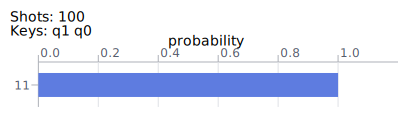

In [109]:
res.svg()

In [110]:
res.data

{'11': 100}

In [2]:
from mindquantum.utils.show_info import InfoTable

InfoTable('mindquantum', 'numpy')

Software,Version
mindquantum,0.9.0
numpy,1.21.6
System,Info
Python,3.9.13
OS,Linux x86_64
Memory,16.62 GB
CPU Max Thread,16
Date,Wed Jan 10 15:44:31 2024
